## Prepare X_train, X_val, y_train, y_val

In [1]:
import LoadAndPreprocessDataset

In [2]:
#Load filenames
train,val,test = LoadAndPreprocessDataset.loadDatasetFilenames()

#Load TRAIN files
X,y_train=LoadAndPreprocessDataset.loadBatch(train,batch_size=10000)
#Preprocess TRAIN
X_train=LoadAndPreprocessDataset.MFCC_DELTA_12(X)
#Release memory
del(X)

#Load VAL files
X,y_val=LoadAndPreprocessDataset.loadBatch(val,batch_size=1000)
#Preprocess VAL
X_val=LoadAndPreprocessDataset.MFCC_DELTA_12(X)
#Release memory
del(X)

(10000, 36, 126)
(10000,)
(1000, 36, 126)
(1000,)


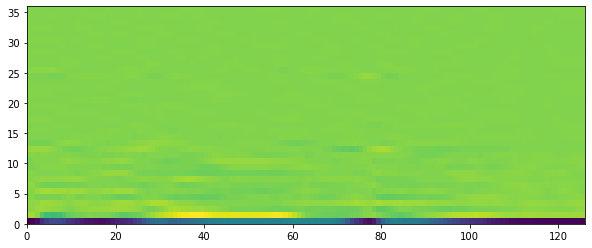

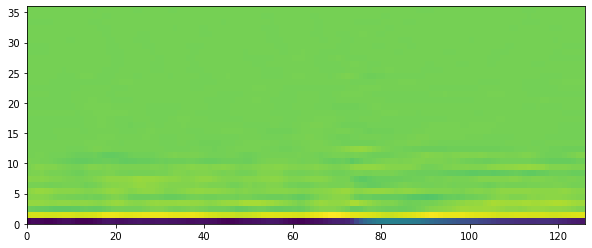

In [3]:
# Look at some data

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.pcolormesh(X_train[0])
plt.show()

plt.figure(figsize=(10, 4))
plt.pcolormesh(X_val[0])
plt.show()

## Define NN

In [4]:
import Models

In [5]:
categories=['yes','no','up','down','left','right','on','off','stop','go']
nCategories=len(categories)

modelName="simpleNN-Selu"

model = Models.SimpleNN(nCategories,
                        inputShape=X_train.shape[1:],
                        name=modelName)

model.compile(optimizer='Nadam',
              loss=['sparse_categorical_crossentropy'],
              metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "simpleNN-Selu"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36, 126)]         0         
_________________________________________________________________
flatten (Flatten)            (None, 4536)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                290368    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 292,778
Trainable params: 292,778
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, TensorBoard
import datetime

log_dir = "logs/fit/" +modelName+"-"+ datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
my_callbacks = [
    EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10,
                  verbose=1, restore_best_weights=True),
    ModelCheckpoint('models/'+modelName+'.h5',
                    monitor='val_sparse_categorical_accuracy',
                    verbose=1, save_best_only=True)
]


In [7]:
results = model.fit(x=X_train,
                    y=y_train,
                    validation_data=(X_val,y_val),
                    batch_size=64,
                    epochs=60,
                    verbose=1)

model.save('models/'+modelName+'.h5')

Train on 10000 samples, validate on 1000 samples
Epoch 1/60
10000/10000 [==============================] - 2s 226us/sample - loss: 7.0907 - sparse_categorical_accuracy: 0.1656 - val_loss: 2.8115 - val_sparse_categorical_accuracy: 0.1840
Epoch 2/60
10000/10000 [==============================] - 1s 90us/sample - loss: 2.2194 - sparse_categorical_accuracy: 0.2257 - val_loss: 2.3336 - val_sparse_categorical_accuracy: 0.1860
Epoch 3/60
10000/10000 [==============================] - 1s 95us/sample - loss: 1.9458 - sparse_categorical_accuracy: 0.2852 - val_loss: 3.5584 - val_sparse_categorical_accuracy: 0.2410
Epoch 4/60
10000/10000 [==============================] - 1s 93us/sample - loss: 3.7307 - sparse_categorical_accuracy: 0.1483 - val_loss: 2.1696 - val_sparse_categorical_accuracy: 0.1920
Epoch 5/60
10000/10000 [==============================] - 1s 93us/sample - loss: 2.0786 - sparse_categorical_accuracy: 0.2194 - val_loss: 2.1229 - val_sparse_categorical_accuracy: 0.2490
Epoch 6/60
1000

10000/10000 [==============================] - 1s 89us/sample - loss: 0.9836 - sparse_categorical_accuracy: 0.6320 - val_loss: 1.2925 - val_sparse_categorical_accuracy: 0.6030
Epoch 45/60
10000/10000 [==============================] - 1s 86us/sample - loss: 0.9528 - sparse_categorical_accuracy: 0.6433 - val_loss: 1.6018 - val_sparse_categorical_accuracy: 0.5590
Epoch 46/60
10000/10000 [==============================] - 1s 95us/sample - loss: 0.9473 - sparse_categorical_accuracy: 0.6490 - val_loss: 1.3284 - val_sparse_categorical_accuracy: 0.5970
Epoch 47/60
10000/10000 [==============================] - 1s 111us/sample - loss: 0.9263 - sparse_categorical_accuracy: 0.6543 - val_loss: 1.4297 - val_sparse_categorical_accuracy: 0.5780
Epoch 48/60
10000/10000 [==============================] - 1s 99us/sample - loss: 0.9190 - sparse_categorical_accuracy: 0.6556 - val_loss: 1.4731 - val_sparse_categorical_accuracy: 0.5920
Epoch 49/60
10000/10000 [==============================] - 1s 101us/sam

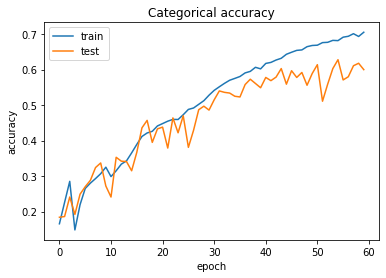

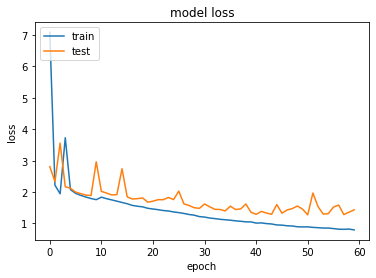

In [8]:
import matplotlib.pyplot as plt

# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Test the model

In [9]:
#Load TEST files
X,y_test=LoadAndPreprocessDataset.loadBatch(val,batch_size=1000)
#Preprocess TEST
X_test=LoadAndPreprocessDataset.MFCC_DELTA_12(X)
#Release memory
del(X)

In [11]:
#load best model
from tensorflow.keras.models import load_model
model = load_model('models/'+modelName+'.h5')

# Test the model on test data
import numpy as np
score = model.evaluate(X_test, y_test)
y_pred=np.argmax(model.predict(X_test),1)

1000/1000 [==============================] - 0s 196us/sample - loss: 1.4404 - sparse_categorical_accuracy: 0.5980


## Metrics Summary

Train loss: 0.7946577465057373
Train accuracy: 0.7053999900817871
Val loss: 1.4349670896530151
Val accuracy: 0.6000000238418579
Test loss: 1.440446969985962
Test accuracy: 0.598
Bias: 0.2846000099182129
Variance: 0.1053999662399292
Precision: 0.598
Recall: 0.598
F1: 0.598
Confusion matrix, without normalization


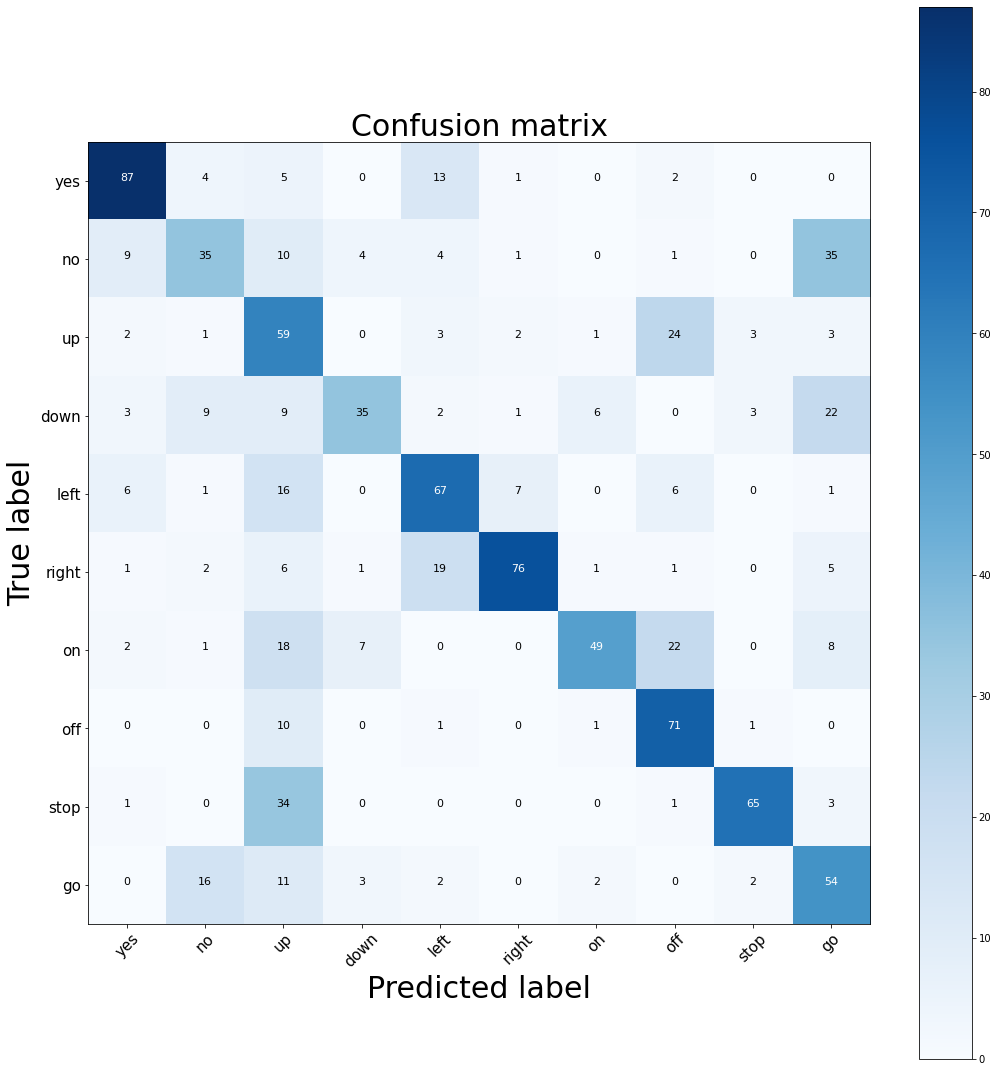

In [12]:
train_loss=results.history.get('loss')[-1]
val_loss=results.history.get('val_loss')[-1]

train_error=1-results.history.get('sparse_categorical_accuracy')[-1]
val_error=1-results.history.get('val_sparse_categorical_accuracy')[-1]

test_loss=score[0]
test_error=1-score[1]

print('Train loss:', train_loss)
print('Train accuracy:', 1-train_error)
print('Val loss:', val_loss)
print('Val accuracy:', 1-val_error)
print('Test loss:', test_loss)
print('Test accuracy:', score[1])

optimal_error=0.01 #human error

bias=train_error-optimal_error
variance=val_error-train_error
print("Bias:",bias)
print("Variance:",variance)


# Precision and Recall(sensitivity/true positive rate)
from sklearn.metrics import precision_score, recall_score
prec=precision_score(y_test, y_pred,average='micro')
rec=recall_score(y_test, y_pred,average='micro')

#F1 - high if both recall and precision are high.
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred,average='micro')

print("Precision:",prec)
print("Recall:",rec)
print("F1:",f1)


# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import audioUtils
audioUtils.plot_confusion_matrix(cm,categories, normalize=False)

In [ ]:
#ROC FOR MULTICLASS?????
"""
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--") # dashed diagonal
    # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

#AUC Score
#perfect classifier=1, purely random=0.5.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)"""